## Assignment

The Red Bull data contains the sales amount and the expenses in dollars for the following channels:

- Banner ad
- Facebook
- Instagram
- E-zine
- TV
- Twitter
- YouTube

Action items:

- Explore the data; discuss the relationship between the input variables and the output variable.
- Apply the OLS model using all the input variables.
- Evaluate the model performance; discuss the residual plot.
- Find which channel is the best using linear regression, and explain why. 




In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/redbull.csv')
df.head()

,twitter,banner,facebook,instagram,youtube,tv,ezine,sales
0,88,290.4,332.7,0.0,325.9,26005.0,25703.7,300000
1,44,77.6,625.0,0.0,272.8,25835.6,25658.0,334000
2,345,200.7,505.7,0.0,5.8,27205.6,27003.9,344000
3,0,308.2,420.4,60.9,0.0,27925.2,27607.0,363000
4,0,258.0,406.8,70.3,0.0,30863.4,30605.3,405000


In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/bkwei/python_notebooks/busa_603_python_labs/redbull.csv')
df.head()



,twitter,banner,facebook,instagram,youtube,tv,ezine,sales
0,88,290.4,332.7,0.0,325.9,26005.0,25703.7,300000
1,44,77.6,625.0,0.0,272.8,25835.6,25658.0,334000
2,345,200.7,505.7,0.0,5.8,27205.6,27003.9,344000
3,0,308.2,420.4,60.9,0.0,27925.2,27607.0,363000
4,0,258.0,406.8,70.3,0.0,30863.4,30605.3,405000


### Instructor Solutions

In [2]:
df.isna().sum()

twitter      0
banner       0
facebook     0
instagram    0
youtube      0
tv           0
ezine        0
sales        0
dtype: int64

In [3]:
list(df)

['twitter',
 'banner',
 'facebook',
 'instagram',
 'youtube',
 'tv',
 'ezine',
 'sales']

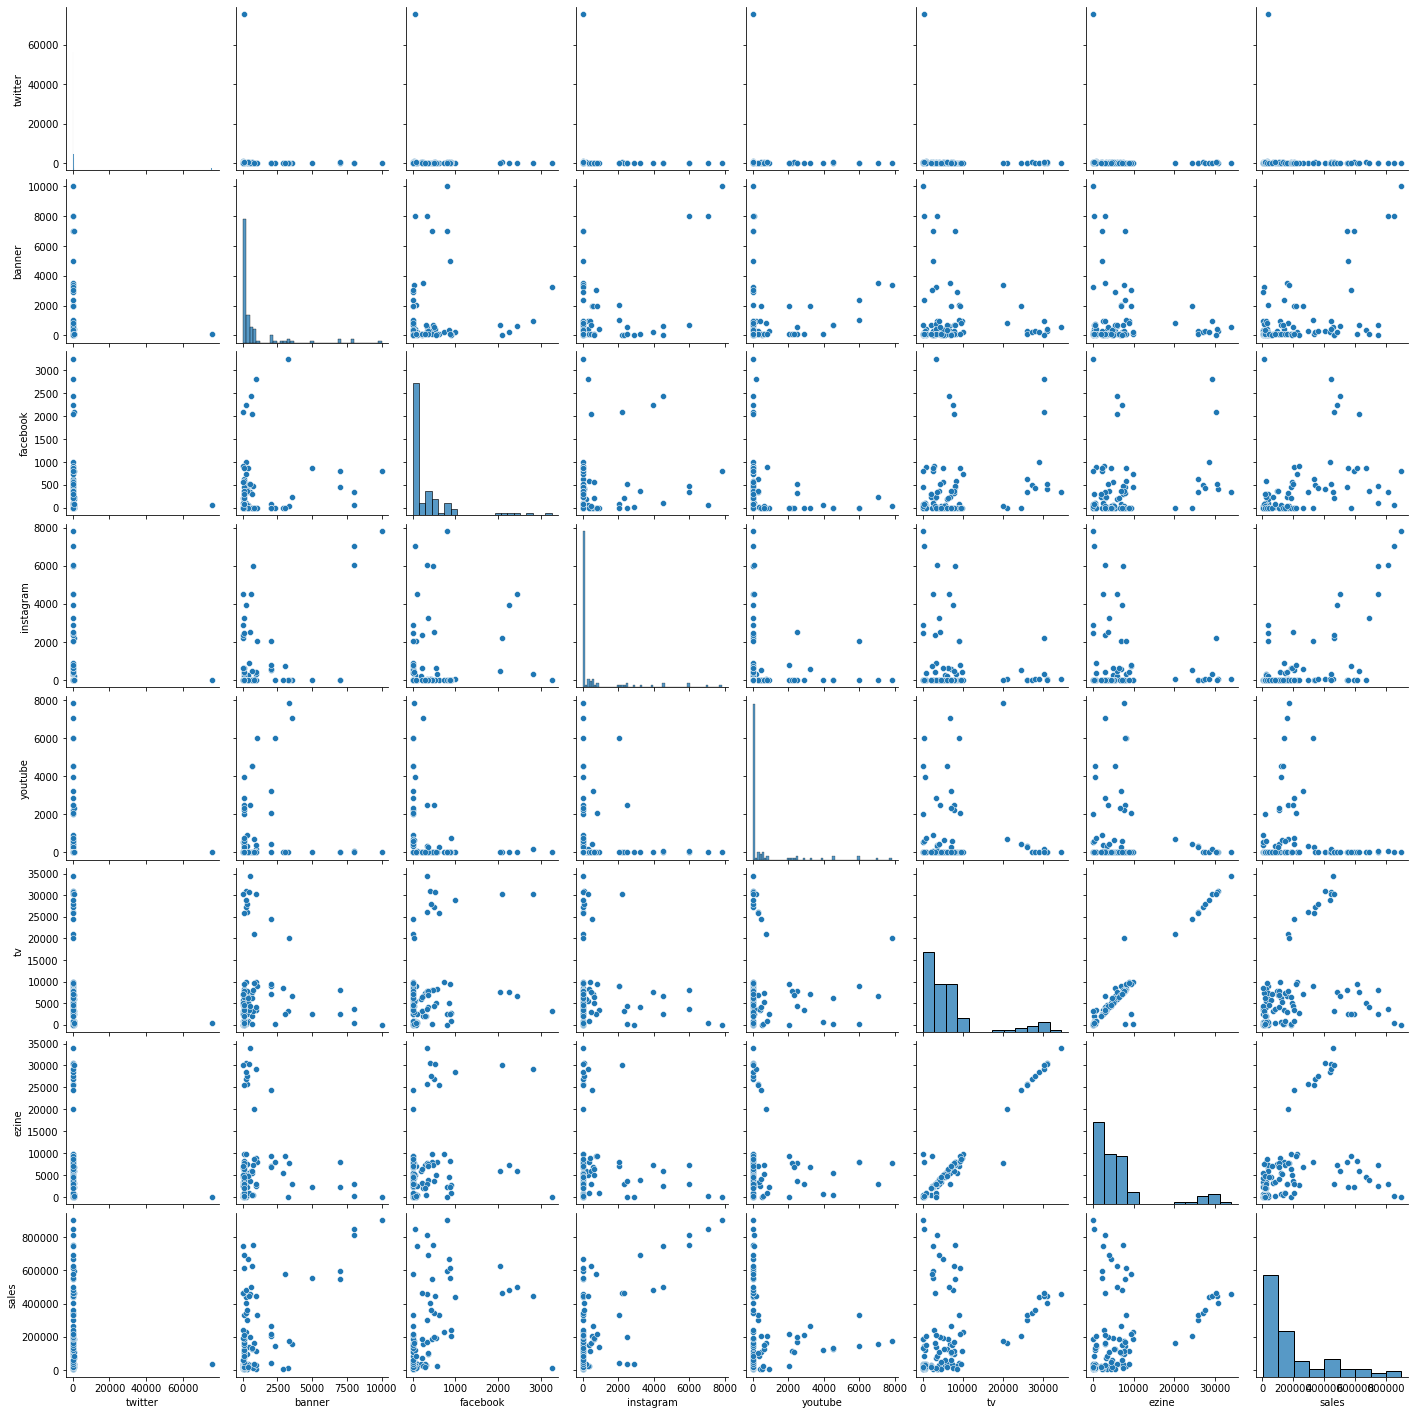

In [6]:
import seaborn as sns

sns.pairplot(df, height=2.5)

In [4]:
import statsmodels.formula.api as sm
model = sm.ols(formula="sales~twitter+banner+facebook+instagram+youtube+tv+ezine", data=df).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     30.05
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           5.75e-22
Time:                        02:28:00   Log-Likelihood:                -1424.0
No. Observations:                 108   AIC:                             2864.
Df Residuals:                     100   BIC:                             2886.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.867e+04   1.94e+04      1.993      0.0

In [7]:
df['y_pred'] = y_pred = model.predict()
df.head()

,twitter,banner,facebook,instagram,youtube,tv,ezine,sales,y_pred
0,88,290.4,332.7,0.0,325.9,26005.0,25703.7,300000,303311.679271
1,44,77.6,625.0,0.0,272.8,25835.6,25658.0,334000,317541.588840
2,345,200.7,505.7,0.0,5.8,27205.6,27003.9,344000,324617.627761
3,0,308.2,420.4,60.9,0.0,27925.2,27607.0,363000,330970.873104
4,0,258.0,406.8,70.3,0.0,30863.4,30605.3,405000,356617.088765


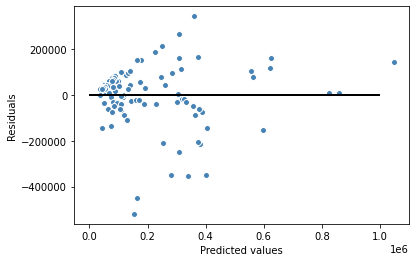

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['y_pred'],  df['y_pred'] - df['sales'],
            c='steelblue', marker='o', edgecolor='white'
            )
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=0, xmax=1000000, color='black', lw=2)

plt.show()

Significant variables:

- banner
- facebook
- instagram
- ezine

Coefficient, instagram     73.4100 is the best.